In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes =True)  


In [2]:
data=pd.read_csv('hayes-roth.data', delimiter=',', header= 0, names= ['name', 'hobby', 'age','educational level', 'marital status','class'])
data.head()

,name,hobby,age,educational level,marital status,class
0,10,2,1,3,2,2
1,83,3,1,4,1,3
2,61,2,4,2,2,3
3,107,1,1,3,4,3
4,113,1,1,3,2,2


In [3]:
target_names= {'target_names':['','Low','Medium','high']}
ds= pd.DataFrame(target_names)
ds


,target_names
0,
1,Low
2,Medium
3,high


In [4]:
data['class']=data['class'].apply(lambda x: ds['target_names'][x])

In [5]:
data.head(8)

,name,hobby,age,educational level,marital status,class
0,10,2,1,3,2,Medium
1,83,3,1,4,1,high
2,61,2,4,2,2,high
3,107,1,1,3,4,high
4,113,1,1,3,2,Medium
5,80,3,1,3,2,Medium
6,125,3,4,2,4,high
7,36,2,2,1,1,Low


In [6]:
data.describe()

,name,hobby,age,educational level,marital status
count,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.305344,2.000000,1.961832,1.961832,1.954198
std,38.330324,0.822753,0.947909,0.947909,0.951619
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.500000,1.000000,1.000000,1.000000,1.000000
50%,66.000000,2.000000,2.000000,2.000000,2.000000
75%,99.500000,3.000000,2.000000,2.000000,2.000000
max,132.000000,3.000000,4.000000,4.000000,4.000000


In [7]:
data.isnull().sum()

name                 0
hobby                0
age                  0
educational level    0
marital status       0
class                0
dtype: int64

In [9]:
print('Columns with missing values')
print(data.isnull().sum())
print('\n Columns with zero values')
print((data[['name','hobby','age','educational level','marital status','class']]==0).sum())

Columns with missing values
name                 0
hobby                0
age                  0
educational level    0
marital status       0
class                0
dtype: int64

 Columns with zero values
name                 0
hobby                0
age                  0
educational level    0
marital status       0
class                0
dtype: int64


In [11]:
data[['name','hobby',
         'age',
         'educational level',
       'marital status', 'class']] = data[['name',
                                              'hobby',
                                              'age',
                                              'educational level',
                                              'marital status', 'class']].replace(0, np.NaN)
print('Columns with missing values')
print(data.isnull().sum())

Columns with missing values
name                 0
hobby                0
age                  0
educational level    0
marital status       0
class                0
dtype: int64


In [12]:

# fill missing values with mean column values
data.fillna(data.mean(), inplace=True)
# count the number of NaN values in each column
print(data.isnull().sum())

name                 0
hobby                0
age                  0
educational level    0
marital status       0
class                0
dtype: int64


In [13]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/hayes-roth/hayes-roth.data"

# load dataset into Pandas DataFrame
PCA_df = pd.read_csv(url, names=['name','hobby','age','educational level','marital status','target'])

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
features = ['name','hobby','age','educational level','marital status']
# Separating out the features
x = PCA_df.loc[:, features].values
# Separating out the target
y = PCA_df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print (x)

[[ 0.66922065  0.         -1.010753   -1.010753    0.0481311 ]
 [-1.48278301  0.         -1.010753    1.10701519  0.0481311 ]
 [ 0.43302513  1.22474487 -1.010753    2.16589928 -1.010753  ]
 [-0.14434171  0.          2.16589928  0.0481311   0.0481311 ]
 [ 1.06287986 -1.22474487 -1.010753    1.10701519  2.16589928]
 [ 1.22034354 -1.22474487 -1.010753    1.10701519  0.0481311 ]
 [ 0.35429329  1.22474487 -1.010753    1.10701519  0.0481311 ]
 [ 1.53527091  1.22474487  2.16589928  0.0481311   2.16589928]
 [-0.80044039  0.          0.0481311  -1.010753   -1.010753  ]
 [ 1.01039197  1.22474487  0.0481311  -1.010753   -1.010753  ]
 [ 0.38053723 -1.22474487  0.0481311  -1.010753   -1.010753  ]
 [ 1.45653907  0.          0.0481311   1.10701519  2.16589928]
 [ 0.72170855 -1.22474487 -1.010753    0.0481311  -1.010753  ]
 [-0.17058566  0.         -1.010753    0.0481311   0.0481311 ]
 [-1.53527091  0.          2.16589928 -1.010753    2.16589928]
 [-1.22034354 -1.22474487 -1.010753    1.10701519  1.10

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [16]:
finalDf = pd.concat([principalDf, PCA_df[['target']]], axis = 1)


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


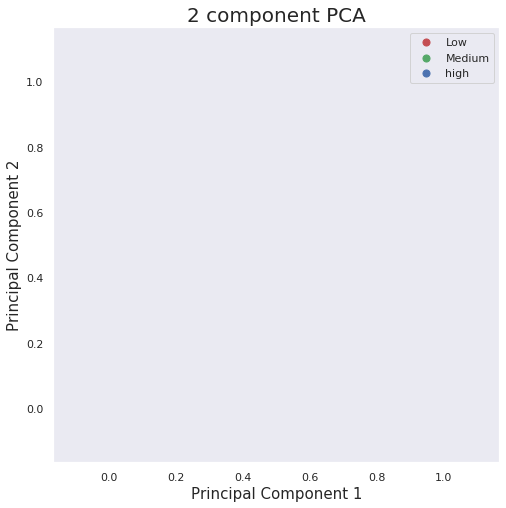

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set(color_codes=True)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Low', 'Medium', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [18]:
print(pca.explained_variance_ratio_)


[0.23636051 0.21904621]
